# Машинное обучение
## Домашнее задание №1: KNN + Линейные модели

**Срок сдачи:** 5 марта 2023, 23:59

**Максимально баллов:** 10

**Штраф за опоздание:** по 2 балла за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла. Формат сдачи будет указан чуть позже.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 баллов

При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность.

## KNN (5 баллов)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'numpy'

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой.
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [175]:
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
class MyKNeighborsClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, n_neighbors=5, metric='euclidean', algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if self.algorithm == 'kd_tree' and self.metric == 'euclidean':
            self.tree = KDTree(X)
        return self

    def predict(self, X):
        pred = []

        if self.algorithm == "brute":
            if self.metric == 'cosine':
                distances = cosine_distances(X, self.X_train)
            elif self.metric == 'euclidean':
                distances = euclidean_distances(X, self.X_train)
            for dist in distances:
                k_neighbors = np.argsort(dist)[:self.n_neighbors]
                pred.append(np.argmax(np.bincount(self.y_train[k_neighbors])))

        elif self.algorithm == "kd_tree" and self.metric == 'euclidean':
            _, ind = self.tree.query(X, k=self.n_neighbors)
            for neighbors_row in ind:
                pred.append(np.argmax(np.bincount(self.y_train[neighbors_row])))

        return np.array(pred)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [144]:
iris = datasets.load_iris()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [146]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [147]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(n_neighbors=2)

In [148]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза.
Для этого используем numpy.

In [73]:
%timeit clf.fit(X_train, y_train)

409 µs ± 62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [74]:
%timeit my_clf.fit(X_train, y_train)

370 ns ± 117 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [75]:
%timeit clf.predict(X_test)

2.77 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
%timeit my_clf.predict(X_test)

400 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза.
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn.

In [78]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [80]:
%time clf.fit(X_train, y_train)

CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.33 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [81]:
%time my_clf.fit(X_train, y_train)

CPU times: user 472 µs, sys: 0 ns, total: 472 µs
Wall time: 481 µs


In [82]:
%time clf.predict(X_test)

CPU times: user 3.86 ms, sys: 999 µs, total: 4.86 ms
Wall time: 4.77 ms


array([2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1])

In [83]:
%time my_clf.predict(X_test)

CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 1.32 ms


[2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1]

In [84]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [191]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [192]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=200)
X_train_counts = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

Модуль cross_calidation устарел

In [194]:
from sklearn.model_selection import KFold

In [195]:
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X_train_counts):
    X_train, X_test = X_train_counts[train_index], X_train_counts[test_index]
    y_train, y_test = target[train_index], target[test_index]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

Оптимальное количество соседей:10


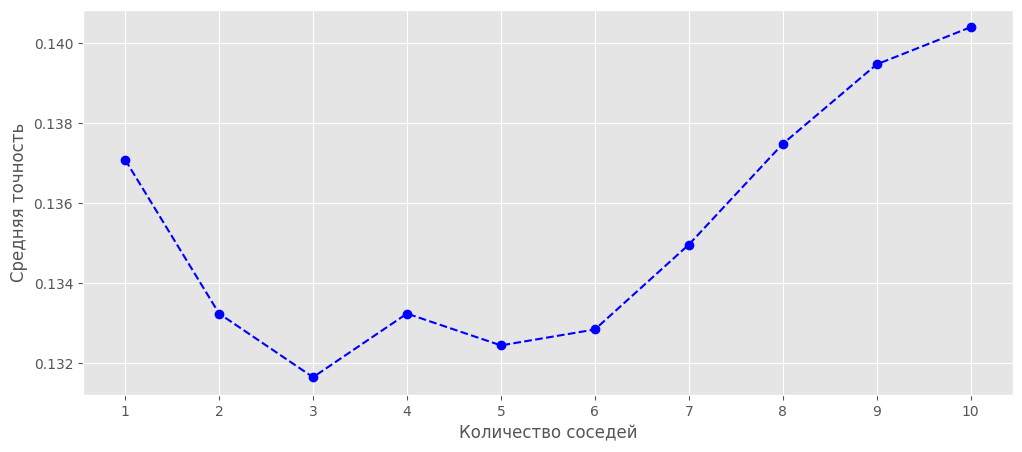

In [196]:
from sklearn.model_selection import cross_val_score

def find_optimal_k(X, y, max_k=10, cv=3,metric='euclidean'):
    mean_accuracy = []

    for k in range(1, max_k + 1):
        knn = MyKNeighborsClassifier(k, metric=metric)
        scores = cross_val_score(knn, X, y, cv=cv,scoring='accuracy')
        mean_accuracy.append(np.mean(scores))

    optimal_k = np.argmax(mean_accuracy) + 1
    return optimal_k, mean_accuracy

optimal_k, mean_accuracy = find_optimal_k(X_train, y_train)

print(f"Оптимальное количество соседей:{optimal_k}")

plt.plot(range(1, 11), mean_accuracy, marker='o', linestyle='--', color='b')
plt.xlabel('Количество соседей')
plt.ylabel('Средняя точность')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidvectorizer_new = TfidfVectorizer(max_df=0.95, min_df=2, max_features=200)
X_test_counts = Tfidvectorizer_new.fit_transform(data).toarray()

kf_test = KFold(n_splits=3)
for train_index, test_index in kf.split(X_test_counts):
    X_train, X_test = X_test_counts[train_index], X_test_counts[test_index]
    y_train, y_test = target[train_index], target[test_index]

Оптимальное количество соседей:10


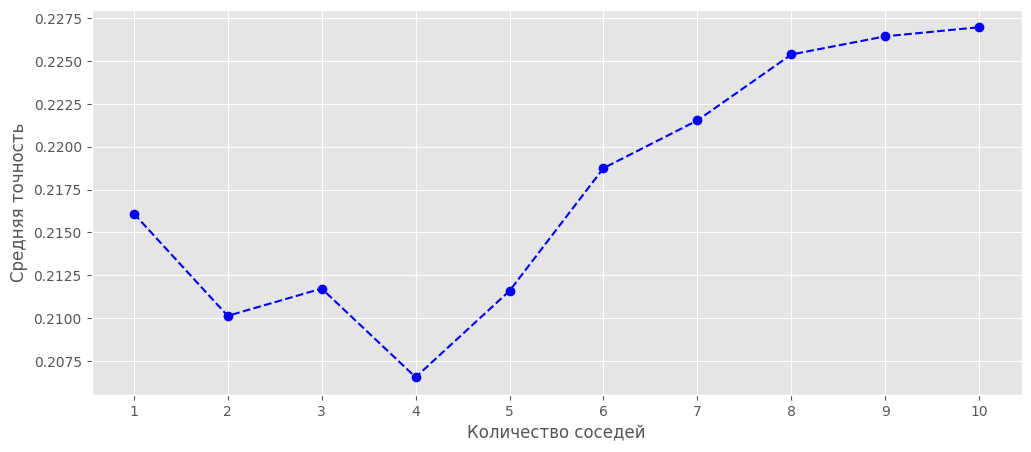

In [206]:
optimal_k, mean_accuracy = find_optimal_k(X_train, y_train, metric='cosine')

print(f"Оптимальное количество соседей:{optimal_k}")

plt.plot(range(1, 11), mean_accuracy, marker='o', linestyle='--', color='b')
plt.xlabel('Количество соседей')
plt.ylabel('Средняя точность')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [207]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
data_test = newsgroups['data']
target_test = newsgroups['target']

In [209]:
# Tfidvectorizer_new = TfidfVectorizer(max_df=0.95, min_df=2, max_features=200)
X_test_counts = Tfidvectorizer_new.transform(data_test).toarray()


Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [210]:
best_knn = MyKNeighborsClassifier(1, metric='cosine')
best_knn.fit(X_train,y_train)
predict = best_knn.predict(X_test_counts)
print(accuracy_score(target_test, predict))

0.17684545937334042


# Линейные модели (5 баллов)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

### Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической:
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно.

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается.
* Правило останова - максимальное количество эпох
    

        ## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array.





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены.

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***.

Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [4]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    ln_x = len(X)

    if shuffle:
        indx = np.random.permutation(ln_x)
    else:
        indx = np.arange(ln_x)

    for i in range(0, ln_x, batch_size):
        # проходимся по всему массиву indx с шагом batch_size
        X_batch = X[indx[i:i+batch_size]]
        y_batch = y[indx[i:i+batch_size]]
        yield X_batch, y_batch

In [29]:
##%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin

def sigmoid(x):
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, batch_size=256, model_type='lin_reg'):
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        if self.model_type == 'lin_reg':
            loss = np.square(X_batch.dot(self.weights) - y_batch).mean()
        elif self.model_type == 'log_reg':
            logits = sigmoid(X_batch.dot(self.weights))
            loss = -np.mean(y_batch * np.log(logits) + (1 - y_batch) * np.log(1 - logits))
        # L2 регуляризация
        reg_loss = (1 /self.C) * np.sum(self.weights ** 2)
        return loss + reg_loss

    def calc_loss_grad(self, X_batch, y_batch):
        n = len(y_batch)
        y_predict = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            # loss_grad = 1 / n * np.dot(X_batch.T, (y_predict - y_batch))
            loss_grad = 2* np.dot(X_batch.T, np.dot(X_batch, self.weights) - y_batch) / y_batch.size
        elif self.model_type == 'log_reg':
            loss_grad = 1 / n * np.dot(X_batch.T, (sigmoid(y_predict) - y_batch))

        reg_grad = (2 /  self.C) * self.weights
        return loss_grad + reg_grad

    def update_weights(self, new_grad):

        self.weights -= self.alpha * new_grad

    def fit(self, X, y):

        n_features = X.shape[1]
        self.weights = np.random.randn(n_features)
        print(self.weights)
        for _ in range(self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, (X_batch, y_batch) in enumerate(new_epoch_generator):
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        print(self.weights)
        return self

    def predict(self, X):
        if self.model_type == 'lin_reg':
            y_hat = X.dot(self.weights)
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(X.dot(self.weights))
            y_hat = (y_hat > 0.5).astype(int)
        return y_hat

Запустите обе регрессии на синтетических данных.


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [19]:

def plot_decision_boundary(clf):
    min_feature1, max_feature1 = X[:, 0].min() - 1, X[:, 0].max() + 1
    min_feature2, max_feature2 = X[:, 1].min() - 1, X[:, 1].max() + 1

    feature1_range, feature2_range = np.meshgrid(np.linspace(min_feature1, max_feature1, 500),
                                                  np.linspace(min_feature2, max_feature2, 500))

    predictions = clf.predict(np.c_[np.ones((feature1_range.ravel().shape[0], 1)),
                                      feature1_range.ravel(),
                                      feature2_range.ravel()])
    predictions = predictions.reshape(feature1_range.shape)

    plt.contourf(feature1_range, feature2_range, predictions, alpha=0.6,
                 levels=np.linspace(predictions.min(), predictions.max(), 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='w')

    plt.title('Decision Boundary Visualization')
    plt.xlabel('Feature 1 Axis')
    plt.ylabel('Feature 2 Axis')
    plt.show()

[ 1.41117206  0.78580383 -0.05746952]
[ 0.01562621  0.0734656  -0.08826966]


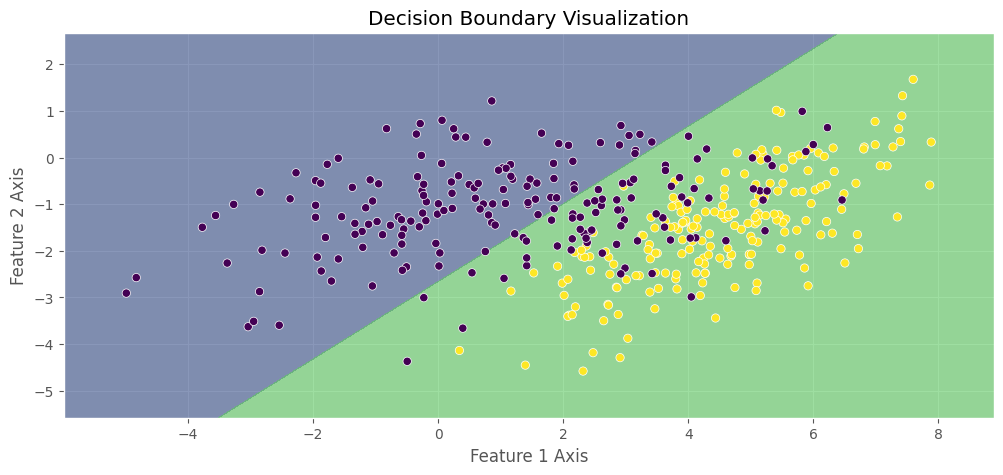

[-0.39121705 -0.27011443  0.32229121]
[-4.26817608  1.0280677  -1.26851618]


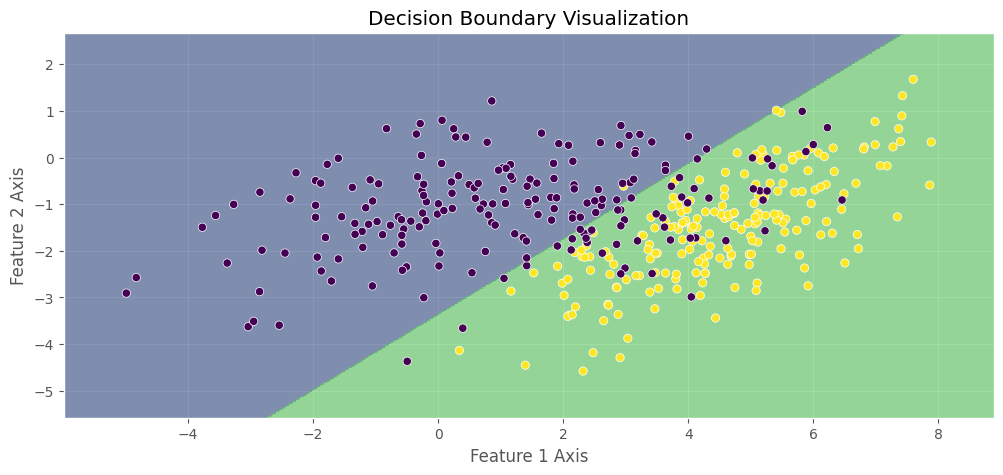

3


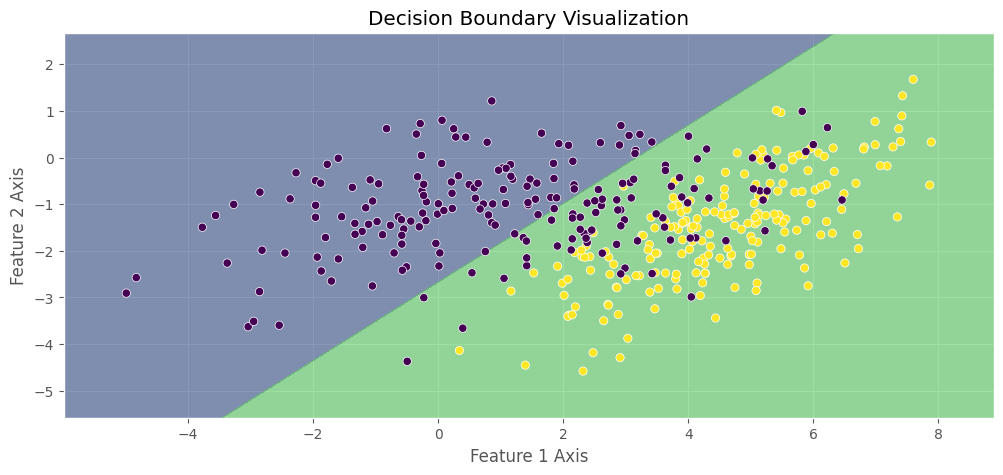

In [41]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

y = np.r_[np.ones(200), np.zeros(200)]

sgd_lin_reg = MySGDClassifier(batch_generator=batch_generator, model_type='lin_reg', C=1, alpha=0.01)
sgd_lin_reg.fit(X_bias, y)
plot_decision_boundary(sgd_lin_reg)

sgd_log_reg = MySGDClassifier(batch_generator=batch_generator, model_type='log_reg', alpha=0.05, C=500)
sgd_log_reg.fit(X_bias, y)
plot_decision_boundary(sgd_log_reg)


from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.01)
clf.fit(X_bias, y)
print(clf.n_features_in_)
plot_decision_boundary(clf)

Далее будем анализировать Ваш алгоритм.
Для этих заданий используйте датасет ниже.

In [216]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]


Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике.

$N$ можно брать 10, 50, 100 и т.д.

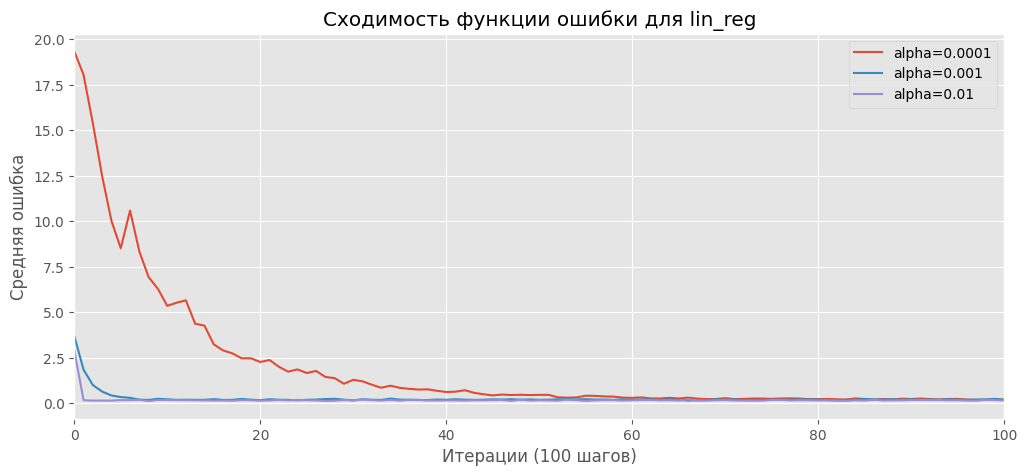

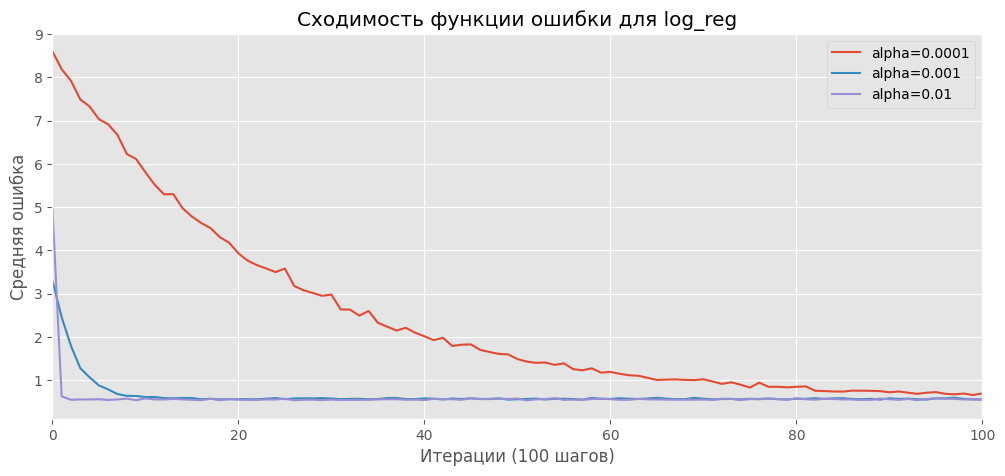

In [58]:

def plot_loss_convergence(X, y, alphas, N, model_type):
    for alpha in alphas:
        model = MySGDClassifier(batch_generator=batch_generator, alpha=alpha, batch_size=512, model_type=model_type)
        model.fit(X, y)
        avg_losses = []
        num_batches = len(model.errors_log['iter']) // N
        for i in range(num_batches):
            start = i * N
            end = (i + 1) * N
            avg_loss = np.mean(model.errors_log['loss'][start:end])
            avg_losses.append(avg_loss)
        # for i in range(0,len(X),N):
        #     avg_loss = np.mean(model.errors_log['loss'][i:i+N])
        #     avg_losses.append(avg_loss)
        plt.plot(avg_losses, label=f'alpha={alpha}')
    plt.xlim(0, N) #обрезаем график, так как после N график сходится к 0, и ничего не происходит
    plt.title(f'Сходимость функции ошибки для {model_type}')
    plt.xlabel(f'Итерации ({N} шагов)')
    plt.ylabel('Средняя ошибка')
    plt.legend()
    plt.show()

N = 100
alphas = [0.0001, 0.001, 0.01]

plot_loss_convergence(X_bias, y, alphas, N, model_type='lin_reg')
plot_loss_convergence(X_bias, y, alphas, N, model_type='log_reg')


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)`

При разных alpha разная скорость сходимости, так при более больших alpha ошибка уменьшается быстрее. Большие alpha могут приводить к переходу минимума функции ошибки, а слишком маленькие слишком долго сходятся. Лучше делать адаптивную сходимость, в наших данных alpha=0.01 подходит.

<ipython-input-17-38f0690115df>:27: RuntimeWarning: overflow encountered in scalar multiply
  reg_loss = (1 /self.C) * np.sum(self.weights ** 2)
<ipython-input-17-38f0690115df>:22: RuntimeWarning: overflow encountered in square
  loss = np.square(X_batch.dot(self.weights) - y_batch).mean()
<ipython-input-17-38f0690115df>:27: RuntimeWarning: overflow encountered in square
  reg_loss = (1 /self.C) * np.sum(self.weights ** 2)
<ipython-input-17-38f0690115df>:39: RuntimeWarning: overflow encountered in multiply
  reg_grad = (2 /  self.C) * self.weights
<ipython-input-17-38f0690115df>:40: RuntimeWarning: invalid value encountered in add
  return loss_grad + reg_grad
<ipython-input-17-38f0690115df>:44: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.alpha * new_grad
<ipython-input-17-38f0690115df>:5: RuntimeWarning: overflow encountered in exp
  sigm_value_x = 1 / (1 + np.exp(-x))
<ipython-input-17-38f0690115df>:25: RuntimeWarning: divide by zero encountered in lo

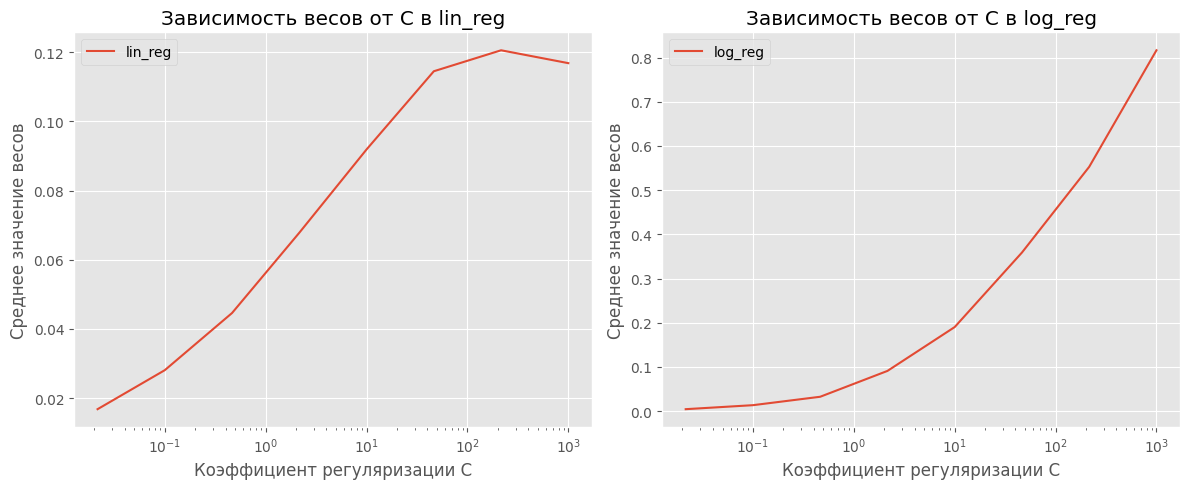

In [62]:
def plot_avg_weights(X, y, Cs, model_type):
    avg_weights = []
    for C in Cs:
        model = MySGDClassifier(batch_generator=batch_generator, C=C, model_type=model_type)
        model.fit(X, y)
        avg_weight = np.abs(model.weights).mean()
        avg_weights.append(avg_weight)

    plt.plot(Cs, avg_weights, label=model_type)
    plt.xscale('log')
    plt.xlabel('Коэффициент регуляризации C')
    plt.ylabel('Среднее значение весов')
    plt.title(f'Зависимость весов от C в {model_type}')
    plt.legend()

Cs = np.logspace(3, -3, 10)

plt.subplot(1, 2, 1)
plot_avg_weights(X_bias, y, Cs, model_type='lin_reg')

plt.subplot(1, 2, 2)
plot_avg_weights(X_bias, y, Cs, model_type='log_reg')

plt.tight_layout()
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса?